<a href="https://colab.research.google.com/github/norayehia/Dialet_classfication_txt/blob/main/deeplearningdilet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas
import string
import nltk
import keras
import sklearn
import time
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf
import numpy as np
from time import time
from nltk.corpus import stopwords
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import TensorBoard
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
import keras.preprocessing.text

In [22]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# load dataset
dataframe = pandas.read_csv("/content/drive/MyDrive/Aimtecnology/out3.csv", header=0)
dataframe.drop_duplicates(inplace = True)
data= dataframe
print(dataframe.head())

print(type(data['sentence_clean']))

  Unnamed: 0                   id dialect  \
0          0  1148538035274964992      IQ   
1          1  1124794063327117184      IQ   
2          2  1173929684414996480      IQ   
3          3  1150535535485698048      IQ   
4          4  1137026164332158976      IQ   

                                            sentence      sentence_clean  
0  @ha___m___ed طلعوا مظاهرات .. ضد الغش لو تظربو...               ha ed  
1  @Ahmad_Madrid90 @Ali1R2 يااخي شكد مستفزة ...طر...  ahmad madrid ali r  
2  @jwana199011 اكيد اكو هن مرتبات من الصغر بس ال...               jwana  
3  @NABAA71243942 راح افتح جمعية ضد النساء لو تخل...               nabaa  
4  @NABAA71243942 @aldhafeeri832 عرب وين وطنبورة ...    nabaa aldhafeeri  
<class 'pandas.core.series.Series'>


In [4]:
train_size = int(len(data) * .8)

print(int(len(data['sentence_clean'])))
print(train_size)

7001
5600


In [ ]:
!pip install datascience

     |████████████████████████████████| 69 kB 6.3 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=61e2d33463ae6eebb9c16b572bd3e72d28a8afb38d76a2407367e0f608a3b7b3
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [ ]:
from datascience import *

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [5]:
import nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [44]:
from nltk.corpus import stopwords
stop = stopwords.words('arabic')


def converter(x):
    try:
        return ' '.join([x.lower() for x in str(x).split() if x not in stop])
    except AttributeError:
        return None  # or some other value

data['sentence_clean'] = data['sentence_clean'].apply(converter)

In [8]:
texts= data['sentence_clean']
tags = data['dialect']


train_posts = data['sentence_clean'][:train_size]
train_tags = data['dialect'][:train_size]



test_posts = data['sentence_clean'][train_size:]
test_tags =  data['dialect'][train_size:]




In [9]:
tokenizer = Tokenizer(num_words=None,lower=False)
#tokenizer.fit_on_texts(texts)
tokenizer.fit_on_texts(
    texts
)
x_train = tokenizer.texts_to_matrix(train_posts, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test_posts, mode='tfidf')


In [10]:
encoder = LabelEncoder()
encoder.fit(tags)
tagst=encoder.fit_transform(tags)

num_classes = int((len(set(tagst))))
print((len(set(tagst))))

y_train = encoder.fit_transform(train_tags)
y_test = encoder.fit_transform(test_tags)



19


In [11]:
from keras.utils import np_utils


In [12]:
y_train=keras.utils.np_utils.to_categorical(y_train,num_classes)
y_test =keras.utils.np_utils.to_categorical(y_test, num_classes)


num_labels = int(len(y_train.shape))
vocab_size = len(tokenizer.word_index) + 1

max_words=vocab_size


In [13]:
import keras.backend as K
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

from keras.metrics import Precision , Recall , Accuracy , TruePositives , TrueNegatives , FalsePositives , FalseNegatives


In [14]:

# Build the model
model = Sequential()
model.add(Dense(1024, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              #'Recall','Precision', f1_metric,'TruePositives','TrueNegatives','FalsePositives','FalseNegatives'
              metrics=['categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              6233088   
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 19)                19475     
                                                                 
 activation_1 (Activation)   (None, 19)                0         
                                                                 
Total params: 6,252,563
Trainable params: 6,252,563
Non-trainable params: 0
_________________________________________________________________


In [17]:
batch_size = 100
epochs = 10

#history = model.fit(x_train, y_train,epochs=epochs )

batch_size = 100
epochs = 10

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)


#model.save('my_model.h1')
model.save('my_model.h1')


Epoch 1/10
51/51 [==============================] - 4s 78ms/step - loss: 0.4334 - categorical_accuracy: 0.8927 - val_loss: 1.2841 - val_categorical_accuracy: 0.7161
Epoch 2/10
51/51 [==============================] - 4s 73ms/step - loss: 0.3807 - categorical_accuracy: 0.8960 - val_loss: 1.5056 - val_categorical_accuracy: 0.7018
Epoch 3/10
51/51 [==============================] - 4s 73ms/step - loss: 0.3628 - categorical_accuracy: 0.8998 - val_loss: 1.6431 - val_categorical_accuracy: 0.6946
Epoch 4/10
51/51 [==============================] - 4s 73ms/step - loss: 0.3580 - categorical_accuracy: 0.8988 - val_loss: 1.7498 - val_categorical_accuracy: 0.6857
Epoch 5/10
51/51 [==============================] - 4s 73ms/step - loss: 0.3547 - categorical_accuracy: 0.8970 - val_loss: 1.8437 - val_categorical_accuracy: 0.6696
Epoch 6/10
51/51 [==============================] - 4s 74ms/step - loss: 0.3520 - categorical_accuracy: 0.8980 - val_loss: 1.9034 - val_categorical_accuracy: 0.6589
Epoch 7/10

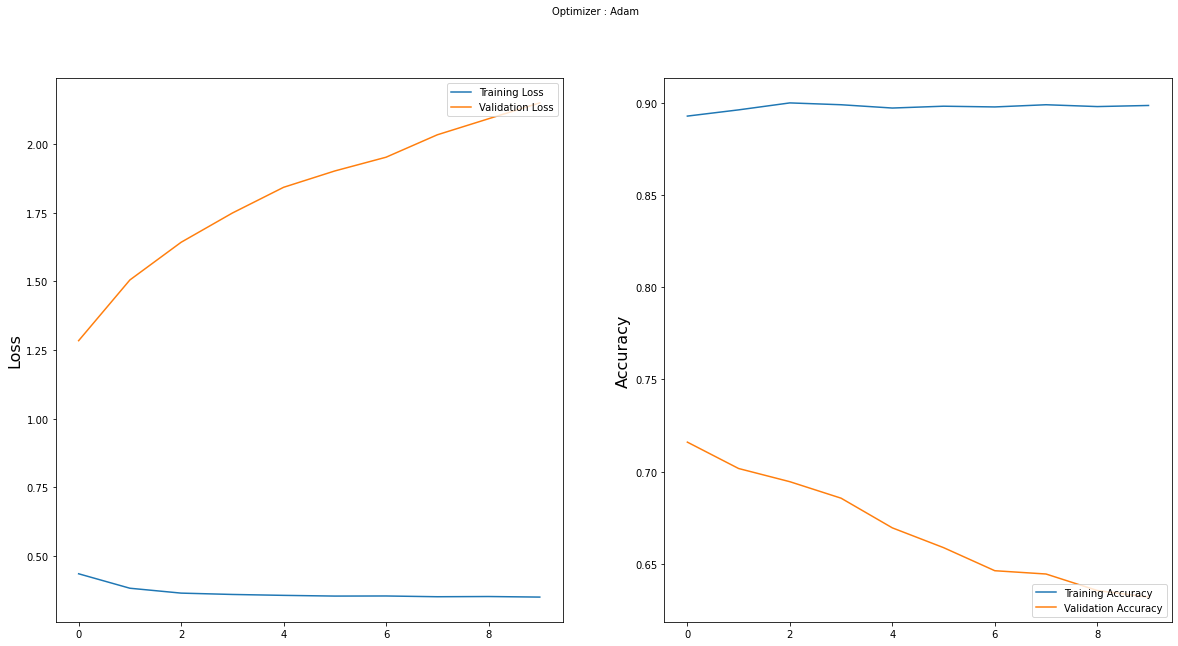

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [24]:
#reconstructed_model = keras.models.load_model("/content/drive/MyDrive/my_modelv2")
model = keras.models.load_model('/content/drive/MyDrive/Aimtecnology/my_model.h1')

In [25]:
y_pred_prob = model.predict(x_test)

In [26]:
y_pred = tf.argmax(y_pred_prob, axis=-1)

In [27]:
y_pred = y_pred.numpy()
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [32]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
from sklearn.metrics import classification_report
classes=["IQ","EG","PL","KW","LY","QA","BH","SA","JO","LB","AE","OM","SY","DZ","SD","MA","TN","YE"]
print(classification_report(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.18      0.01      0.01       269
           1       0.00      0.00      0.00       286
           2       0.27      0.96      0.42       356
           3       0.13      0.01      0.02       186
           4       0.00      0.00      0.00       177
           5       0.06      0.01      0.01       127
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

    accuracy                           0.25      1401
   macro avg       0.05      0.08      0.04      1401
weighted avg       0.13      0.25      0.11      1401



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
cm

array([[  2,   1, 229,   1,   0,   5,   1,   1,  15,  11,   2,   1,   0],
       [  2,   0, 257,   3,   0,   3,   0,   1,  13,   5,   2,   0,   0],
       [  1,   1, 340,   1,   0,   1,   0,   3,   6,   3,   0,   0,   0],
       [  4,   0, 169,   2,   0,   2,   0,   4,   2,   1,   1,   0,   1],
       [  1,   0, 150,   6,   0,   5,   1,   3,   5,   4,   2,   0,   0],
       [  1,   0, 115,   2,   0,   1,   2,   1,   0,   4,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

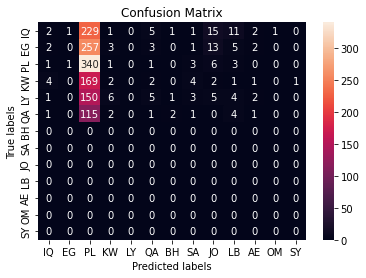

In [37]:
ax = plt.subplot()
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

In [38]:
import pickle
pickle.dump(history, open("model_gb1.pkl", "wb"))

INFO:tensorflow:Assets written to: ram://f25f46dd-cf50-4531-be80-ef27aee2a5ac/assets


In [39]:
x_train.shape

(5600, 6086)

In [40]:
y_train.shape

(5600, 19)

In [41]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [42]:
#model = keras.models.load_model('my_model.h1')
Evaluation_valus = model.evaluate(x_test,y_test,verbose=0)
print("Loss" , 'categorical_accuracy','Recall','Precision','f1_metric','TruePositives','TrueNegatives','FalsePositives','FalseNegatives')

print(Evaluation_valus)


Loss categorical_accuracy Recall Precision f1_metric TruePositives TrueNegatives FalsePositives FalseNegatives
[3.8745110034942627, 0.24625267088413239]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [45]:
from nltk.corpus import stopwords
stop = stopwords.words('arabic')


def converter(x):
    try:
        return ' '.join([x.lower() for x in str(x).split() if x not in stop])
    except AttributeError:
        return None  # or some other value

data['sentence_clean'] = data['sentence_clean'].apply(converter)

In [46]:
for x in data["sentence_clean"][:25]:

    tokens = tokenizer.texts_to_matrix([x], mode='tfidf')

    c=model.predict(np.array(tokens))
    cc=model.predict(tokens)
    #xc = encoder.inverse_transform(cc)


   # print(c,"= \t",cc,"\t",xc)

In [48]:
ccpre = np.argmax(cc, axis=1)
ccpre

array([2])

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
https://stackoverflow.com/questions/50443494/error-in-removing-punctuation-float-object-has-no-attribute-translate

https://stackoverflow.com/questions/60105425/python-in-jupyter-notebooks-table-is-not-defined

https://stackoverflow.com/questions/50443494/error-in-removing-punctuation-float-object-has-no-attribute-translate

https://stackoverflow.com/questions/52736900/how-to-solve-the-attribute-error-float-object-has-no-attribute-split-in-pyth

https://stackoverflow.com/questions/70240387/attributeerror-module-keras-utils-has-no-attribute-to-categorical
